# Logistic Regression from Scratch

Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for a given set of features (or inputs), X. Contrary to popular belief, logistic regression is a regression model. 

### Mathematical Intuition of the Algorithm
  
- The model function for logistic regression is as follows:

	$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
    
    $$g(z) = \frac{1}{1+e^{-z}}$$
    
    
- To train a logistic regression model, you want to find the best $(w,b)$ parameters that fits your dataset.  
    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
    	- $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
			
            $$J(\mathbf{w},b) = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
            
        - The choice of $(w,b)$ that fits your data, the best is the one that has the smallest cost $J(w,b)$.

- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, one can use a method called **gradient descent**. 
  - With each step of gradient descent, the parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  
    The gradient descent algorithm is:
    
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -\alpha 			\frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \newline\; & \phantom {0000} w := w -\alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}\; & \newline & \rbrace\end{align*}$$ 
  
- The trained logistic regression model can then take the input feature and output a prediction $f_{w,b}(x)$. 

## 1. Importing libraries

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='rainbow')

# Stats
import scipy.stats as stats

# Toy Dataset
import sklearn.datasets
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

# Configuring some settings
from sklearn import set_config
set_config(display='diagram')

pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## 2. Getting the dataset

In [2]:
# Getting the dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
# Creating a dataframe
df = pd.DataFrame(data=breast_cancer_dataset['data'], columns=breast_cancer_dataset['feature_names'])
df['Output'] = breast_cancer_dataset['target']
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,0.2522,1.0450,1.649,18.95,0.006175,0.012040,0.01376,0.005832,0.01096,0.001857,13.80,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,1
348,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,0.1707,0.7615,1.090,12.25,0.009191,0.008548,0.00940,0.006315,0.01755,0.003009,12.51,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763,1
472,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,0.2446,0.4334,1.826,23.31,0.003271,0.017700,0.02310,0.008399,0.01148,0.002379,17.18,18.22,112.00,906.6,0.1065,0.2791,0.31510,0.11470,0.2688,0.08273,1
127,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,0.6896,1.3420,5.216,81.23,0.004428,0.027310,0.04040,0.013610,0.02030,0.002686,22.32,25.73,148.20,1538.0,0.1021,0.2264,0.32070,0.12180,0.2841,0.06541,0
214,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,0.06433,0.4207,1.8450,3.534,31.00,0.010880,0.037100,0.03688,0.016270,0.04499,0.004768,16.86,34.85,115.00,811.3,0.1559,0.4059,0.37440,0.17720,0.4724,0.10260,0


## 3. Exploratory Data Analysis

### 3.1. Basic information

In [4]:
# Getting the shape of the dataset
df.shape

(569, 31)

In [5]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# Finding total nos. of duplicated values
df.duplicated().sum()

0

In [7]:
# Looking at the data mathematically
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Output
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Text(0.5, 1.0, 'Corelation between different features')

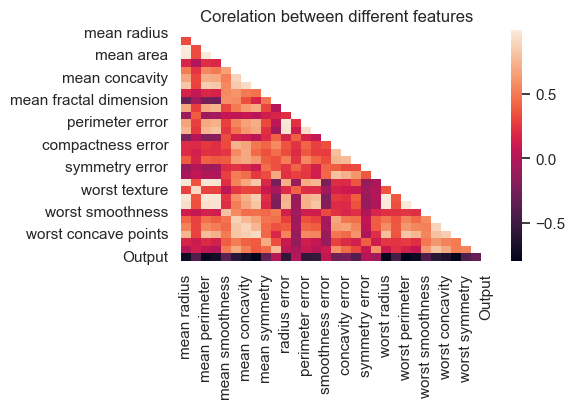

In [8]:
# Corelation between different numerical features
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask).set(facecolor = 'white')
plt.title("Corelation between different features")

### 3.2. Target feature

In [9]:
# Count of Malignant & Benign patients
patient_count = df['Output'].value_counts()

# Percentage of Malignant & Benign patients
patient_percentage = np.round(df['Output'].value_counts()/len(df['Output'])*100,2)

pd.concat([patient_count, patient_percentage], keys=['Count', 'Percentage'], axis=1)

,Count,Percentage
1,357,62.74
0,212,37.26


Text(0.5, 1.0, 'Total nos. of Malignant & Benign patients')

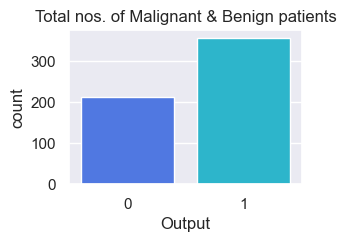

In [10]:
# Plotting the Output feature
plt.figure(figsize=(3,2))
sns.countplot(data=df, x='Output')
plt.title("Total nos. of Malignant & Benign patients")

### 3.3. Numerical features

In [11]:
# Extracting all the numerical features
numerical_features = [feature for feature in df.select_dtypes(exclude='object').columns if feature not in ['Output']]

print(f"Total nos. of numerical features are: {len(numerical_features)}")
print("List of all numerical features are:")
numerical_features

Total nos. of numerical features are: 30
List of all numerical features are:


['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [12]:
# Finding total nos. of unique values in all the numerical features
def numerical_unique_counts():
    for feature in numerical_features:
        print(f"Total nos. of unique values in {feature} feature are: {len(df[feature].unique())}")
        print()

numerical_unique_counts()

Total nos. of unique values in mean radius feature are: 456

Total nos. of unique values in mean texture feature are: 479

Total nos. of unique values in mean perimeter feature are: 522

Total nos. of unique values in mean area feature are: 539

Total nos. of unique values in mean smoothness feature are: 474

Total nos. of unique values in mean compactness feature are: 537

Total nos. of unique values in mean concavity feature are: 537

Total nos. of unique values in mean concave points feature are: 542

Total nos. of unique values in mean symmetry feature are: 432

Total nos. of unique values in mean fractal dimension feature are: 499

Total nos. of unique values in radius error feature are: 540

Total nos. of unique values in texture error feature are: 519

Total nos. of unique values in perimeter error feature are: 533

Total nos. of unique values in area error feature are: 528

Total nos. of unique values in smoothness error feature are: 547

Total nos. of unique values in compactn

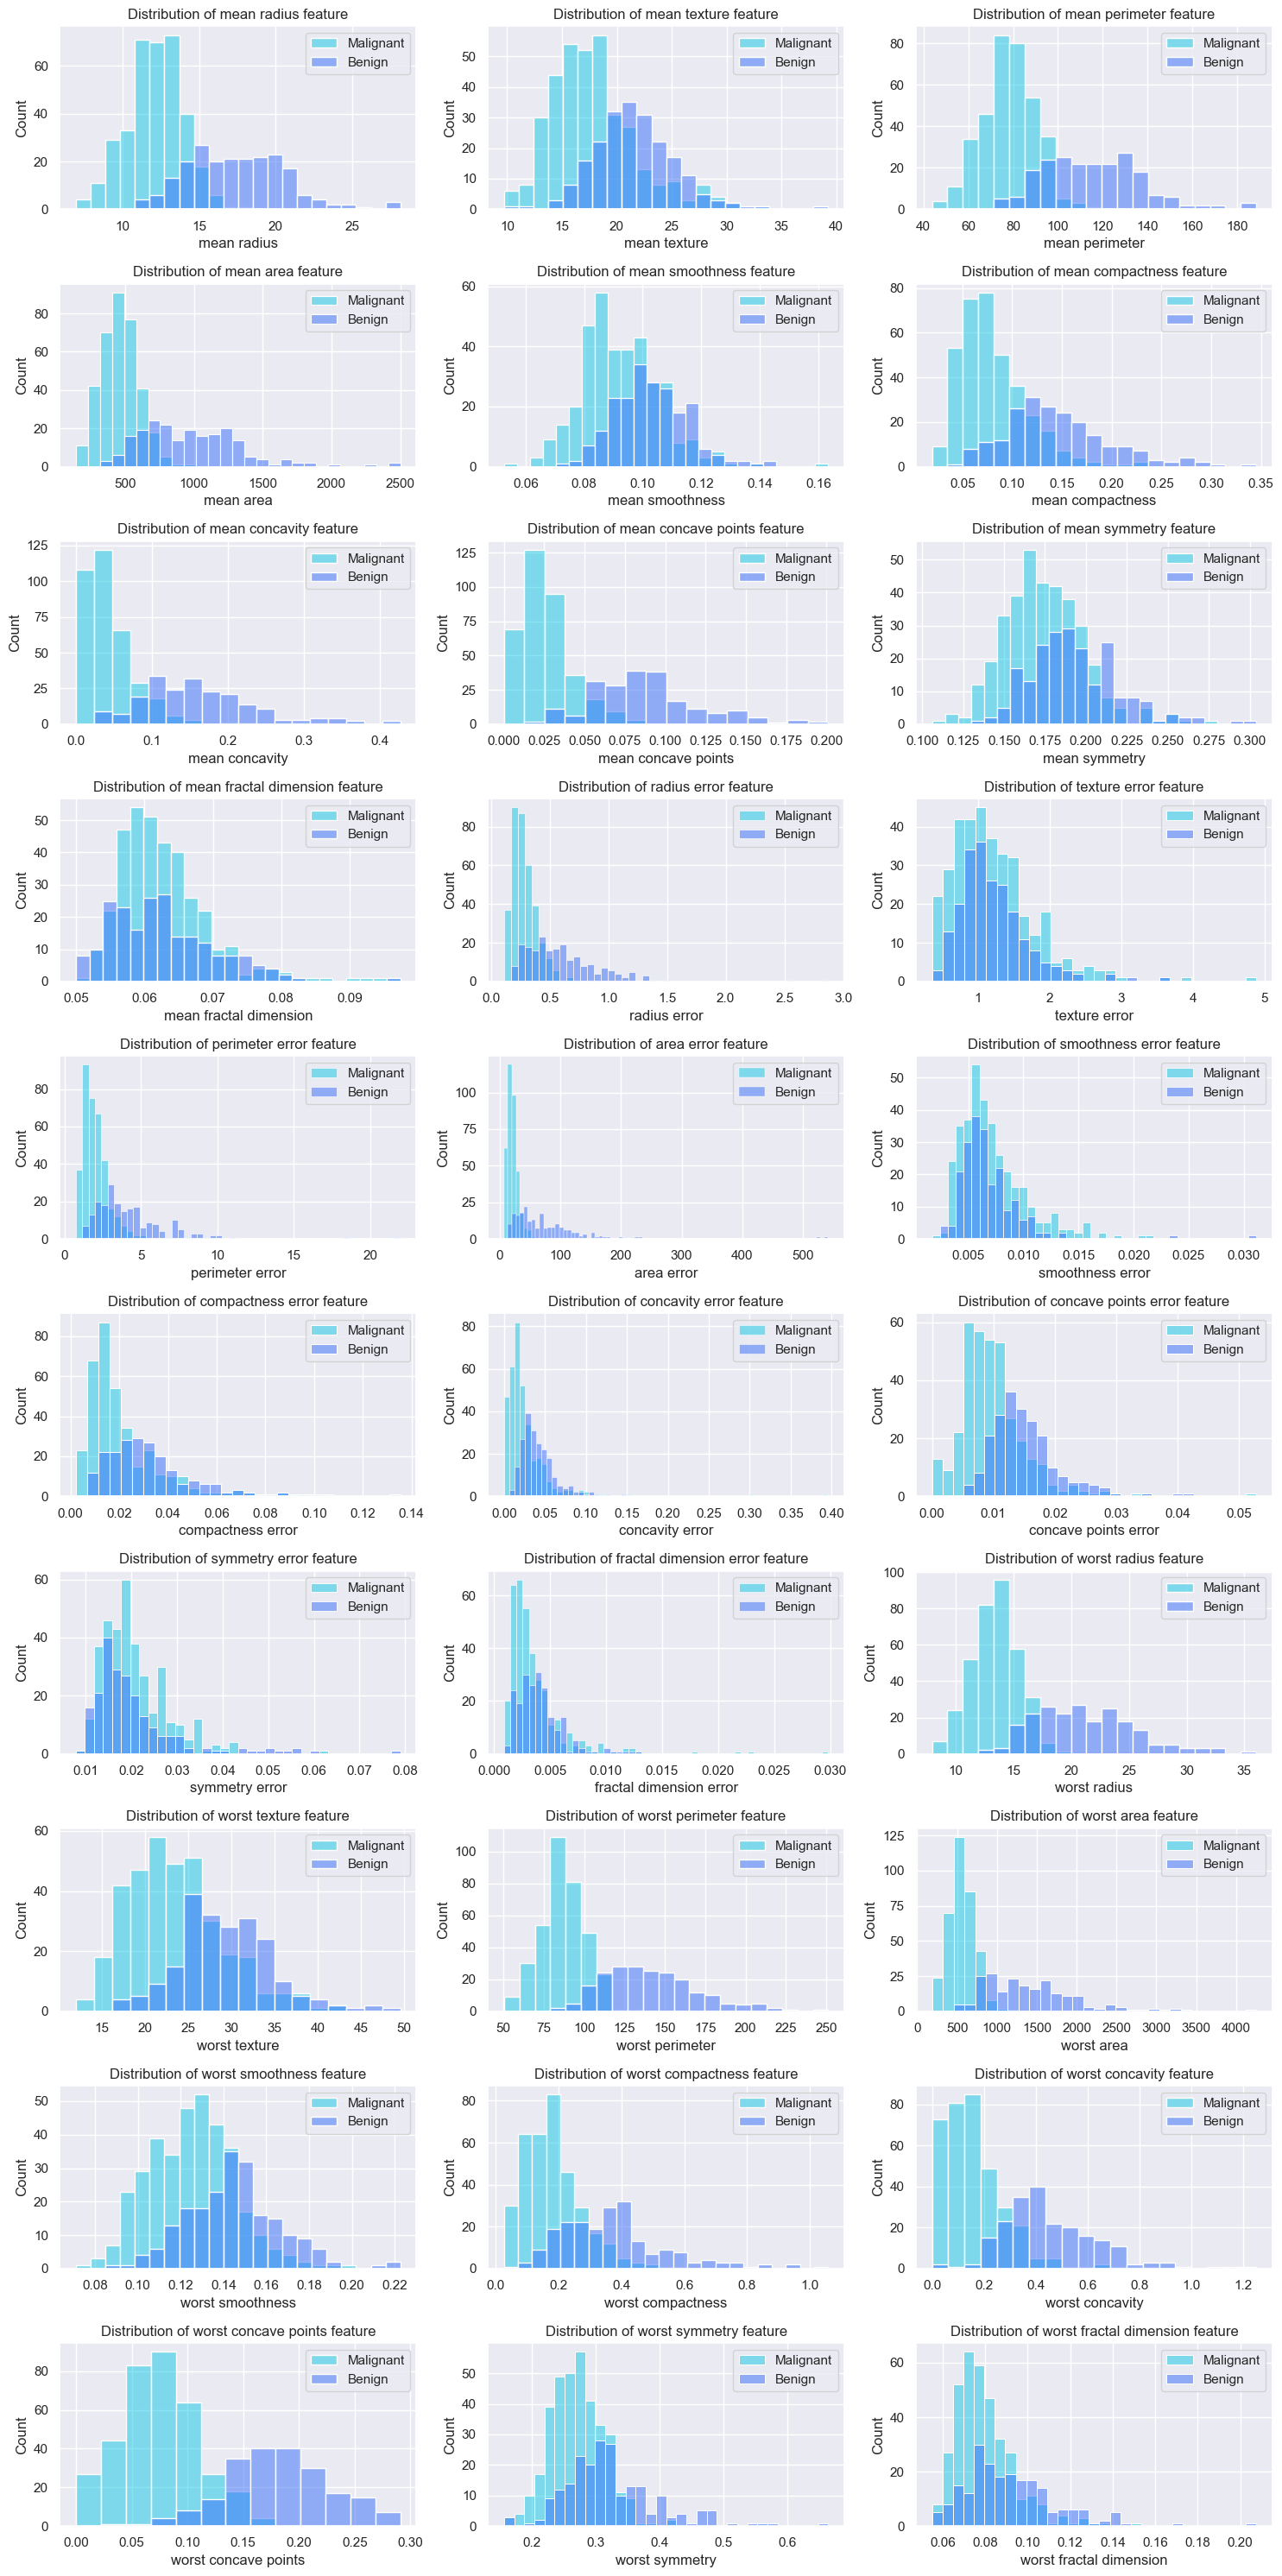

In [13]:
# Plotting distributions of numerical features
plt.figure(figsize=(15,30))
for count, feature in enumerate(numerical_features):
    ax = plt.subplot(10, 3, count+1)
    sns.histplot(data=df, x=feature, hue="Output", ax=ax) 
    ax.set_title(f"Distribution of {feature} feature")
    ax.legend(["Malignant", "Benign"])
plt.tight_layout()

### 3.4. Missing values

In [14]:
df.isna().any().describe()

count        31
unique        1
top       False
freq         31
dtype: object

### 3.5. Outliers

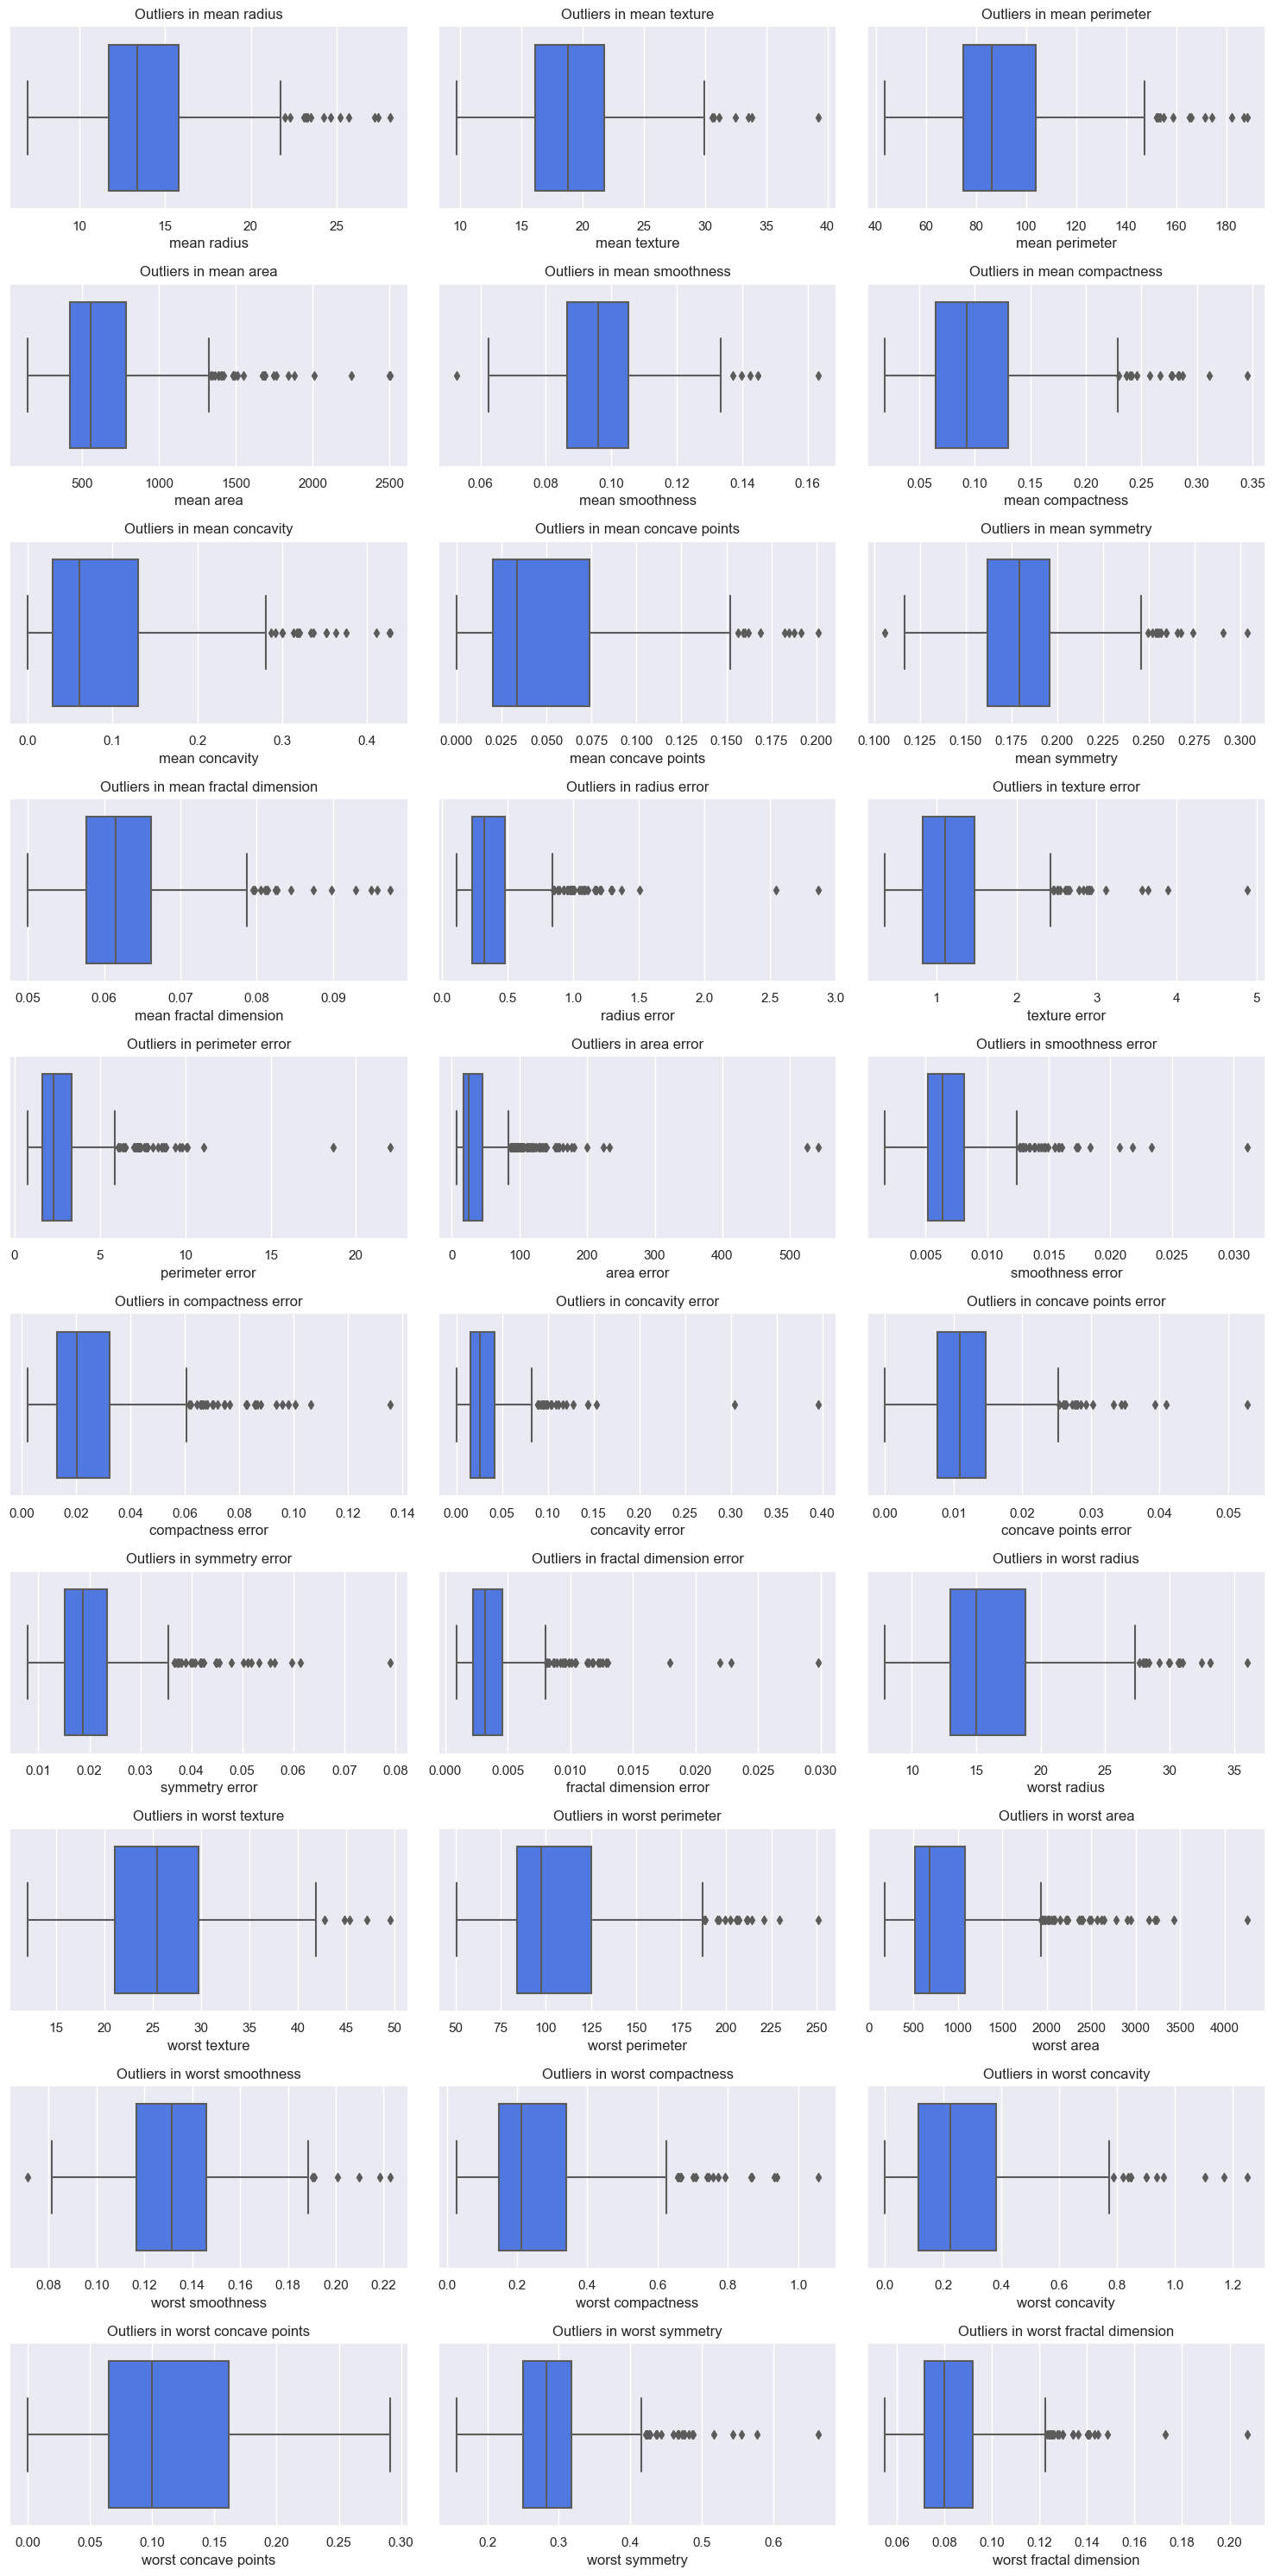

In [15]:
# Finding outliers in the numerical features
plt.figure(figsize=(15,30))
for count, feature in enumerate(numerical_features):
    ax = plt.subplot(10, 3, count+1)
    sns.boxplot(data=df, x=feature, ax=ax) 
    ax.set_title(f"Outliers in {feature}")
plt.tight_layout()

## 4. Logistic Regression Model

### 4.1. Initialising the model

In [16]:
# Constructing Logistic Regression Model from scratch
class LogisticRegressionModel:
    def __init__(self, n_iter=1000, lr=0.01):
        # Total nos. of iterations
        self.n_iter = n_iter
        # Learning rate
        self.lr = lr
        
    def fit(self, X, y):
        # Extracting total nos. of samples & features
        self.n_samples, self.n_features = X.shape
        # Initialising weights & bias
        self.coef_ = np.zeros(self.n_features)
        self.intercept_ = 0
        
        # Optimising weights & bias
        for i in range(self.n_iter):
            # Predictions on training data
            y_pred = 1/(1 + np.exp(-(np.dot(X, self.coef_) + self.intercept_)))
            
            # Computing gradients
            dw = (1/self.n_samples) * (np.dot(X.T, (y_pred - y)))
            db = (1/self.n_samples) * (np.sum(y_pred - y))
            
            # Updating weights & bias
            self.coef_ -= self.lr*dw
            self.intercept_ -= self.lr*db
            
    def predict(self, X):
        # Returning predictions on test data
        return [0 if y<=0.5 else 1 for y in 1/(1 + np.exp(-(np.dot(X, self.coef_) + self.intercept_)))]

### 4.2. Making predictions

In [17]:
# Seperating Target column from rest of the dataset
Y = df['Output']
Y.sample(5)

514    0
244    0
132    0
303    1
46     1
Name: Output, dtype: int32

In [18]:
# Dropping column Output from the dataset
X = df.drop(columns=['Output'])
X.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
252,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.241700,0.097400,0.1733,0.06697,0.7661,0.7800,4.115,92.81,0.008482,0.050570,0.068000,0.019710,0.01467,0.007259,25.28,25.59,159.80,1933.0,0.1710,0.59550,0.848900,0.25070,0.2749,0.12970
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.022510,0.007875,0.1399,0.05688,0.2525,1.2390,1.806,17.74,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.1076,0.12230,0.097550,0.03413,0.2300,0.06769
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.011010,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.15510,0.145900,0.09975,0.2948,0.08452
126,13.61,24.69,87.76,572.6,0.09258,0.07862,0.052850,0.030850,0.1761,0.06130,0.2310,1.0050,1.752,19.83,0.004088,0.011740,0.017960,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.1471,0.28840,0.379600,0.13290,0.3470,0.07900


In [19]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [20]:
# Initialising the model
model = LogisticRegressionModel()

# Training the model
model.fit(X_train, y_train)

# Making predictions on test data
y_pred = model.predict(X_test)

### 4.3. Evaluating the model

In [21]:
# Accuracy score of the model
Accuracy_score = accuracy_score(y_pred, y_test)
print(f"Accuracy score: {Accuracy_score}")

# F1 score of the model
F1_score = f1_score(y_pred, y_test, average='micro')
print(f"F1 score: {F1_score}")

Accuracy score: 0.9440559440559441
F1 score: 0.9440559440559441


<AxesSubplot:>

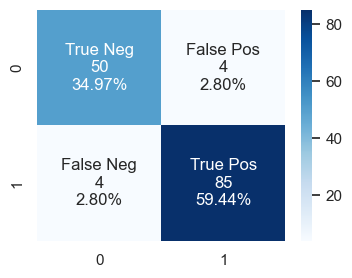

In [22]:
# Confusion Matrix of the model
matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix of the model
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,3))
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')